In [1]:
# Import modules
%matplotlib inline

import os
import pylab
import random
import cPickle as pkl

import numpy as np
import pandas as pd
from scipy.misc import imread, imresize

from lasagne import layers, updates, nonlinearities
from nolearn.lasagne import NeuralNet, BatchIterator, visualize

data_dir = '../data/misc/mnist/'
model_root= '../models'

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled)


In [2]:
# Load train and test set
train = pd.read_csv(data_dir + "train.csv")
test = pd.read_csv(data_dir + "test.csv")

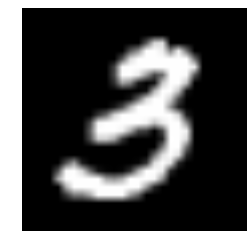

In [3]:
# Visualizing Training Dataset

i = random.randrange(0, train.shape[0])
img = np.asarray(train.ix[i, 1:])
img = img.reshape(28, 28)

pylab.imshow(img)
pylab.gray(); pylab.axis('off')
pylab.show()

#print "-----------------------------"
#print train.head(5)
#print "-----------------------------"
#print train.count()

In [4]:
# Preprocessing step
# Normalizing image
train_labels = train.ix[:, 0].values.astype(np.int32)
train_images = train.ix[:, 1:].values.astype(np.float32)
train_images /= train_images.std(axis = None)
train_images -= train_images.mean()

test_images = test.values.astype(np.float32)
test_images /= test_images.std(axis = None)
test_images -= test_images.mean()

In [5]:
# Reshape dataset to fit to NN
X = train_images.reshape(-1, 1, 28, 28)
y = train_labels

test_x = test_images.reshape(-1, 1, 28, 28)

In [6]:
# Setting architecture of NN
net = NeuralNet(
        layers = [
            ('input', layers.InputLayer),
            ('conv1', layers.Conv2DLayer),
            ('pool1', layers.MaxPool2DLayer),
            ('dropout1', layers.DropoutLayer),
            ('conv2', layers.Conv2DLayer),
            ('pool2', layers.MaxPool2DLayer),
            ('dropout2', layers.DropoutLayer),
            ('conv3', layers.Conv2DLayer),
            ('output', layers.DenseLayer),
        ],
    
        input_shape = (None, 1, 28, 28),
        conv1_num_filters = 32, conv1_filter_size = (5, 5),
        pool1_pool_size = (2, 2),
        dropout1_p = 0.2,
        conv2_num_filters = 32, conv2_filter_size = (5, 5),
        pool2_pool_size = (2, 2),
        conv3_num_filters = 32, conv3_filter_size = (4, 4),
        output_num_units = 10, output_nonlinearity = nonlinearities.softmax,
    
        batch_iterator_train = BatchIterator(batch_size = 150),
        batch_iterator_test = BatchIterator(batch_size = 150),
    
        update = updates.adam,
    
        use_label_encoder = True,
        regression = False,
        max_epochs = 20,
        verbose = 1,
    )

In [7]:
# Train NN
net.fit(X, y);

# Neural Network with 43210 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     1x28x28
  1  conv1     32x24x24
  2  pool1     32x12x12
  3  dropout1  32x12x12
  4  conv2     32x8x8
  5  pool2     32x4x4
  6  dropout2  32x4x4
  7  conv3     32x1x1
  8  output    10

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----
      1       0.57364       0.11643      4.92696      0.96538  1.38s
      2       0.14677       0.07366      1.99271      0.97708  1.35s
      3       0.10496       0.05619      1.86776      0.98246  1.32s
      4       0.08739       0.05155      1.69533      0.98468  1.36s
      5       0.07431       0.04613      1.61089      0.98515  1.32s
      6       0.06347       0.04370      1.45259      0.98573  1.46s
      7       0.06396       0.03936      1.62489      0.98690  1.42s
      8       0.05809       0.03714      1.56406      0.98924  

In [8]:
# Save model
with open(os.path.join(model_root, 'toy_classifier_model.pkl'), 'wb') as f:
    pkl.dump(net, f, -1)

f.close()

In [9]:
# load model
with open(os.path.join(model_root, 'toy_classifier_model.pkl'), 'rb') as f:
    net = pkl.load(f)

f.close()

In [10]:
pred = net.predict(test_x)

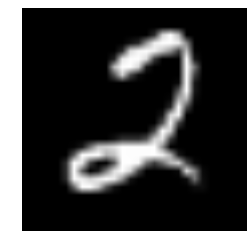

--------------
PREDICTION:  2


In [11]:
# Visualizing output
%matplotlib inline
i = random.randrange(0, 28000)
img = np.asarray(test.ix[i])
img = img.reshape(28, 28)
pylab.imshow(img)
pylab.gray(); pylab.axis('off')
pylab.show()
print '--------------'
print 'PREDICTION: ', pred[i]

<module 'matplotlib.pyplot' from '/home/cuda/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

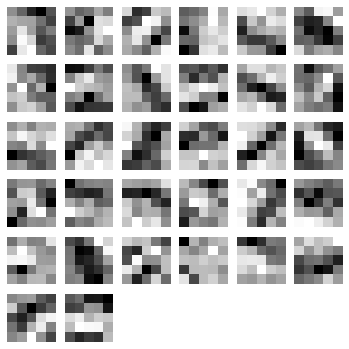

In [12]:
#visualize layer 1 weights
visualize.plot_conv_weights(net.layers_['conv1'])

<module 'matplotlib.pyplot' from '/home/cuda/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

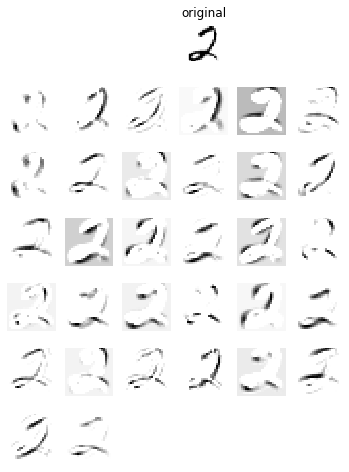

In [13]:
visualize.plot_conv_activity(net.layers_['conv1'], test_x[i:i+1, :, :, :])